In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Import Dependencies
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
# Files to load
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'


In [3]:
# Import city data file into pandas df
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Import ride data into pandas df
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Get column and rows that aren't null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get column and rows that aren't null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban cities
sum(city_data_df['type'] == 'Urban')

66

In [10]:
# Get the number of data points from Suburban cities
sum(city_data_df['type'] == 'Suburban')

36

In [11]:
# Get the number of data points from Rural cities
sum(city_data_df['type'] == 'Rural')

18

In [12]:
# Get the columns and the rows that aren't null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# Get the columns and the rows that aren't null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
# Get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
# Merge datasets into one
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = 'left', on = ['city', 'city'])

# Display the df
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# Create Urban city df
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# Create Suburban and Rural dfs
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']
#rural_cities_df.head()

In [18]:
# Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [19]:
# Create Suburban and Rural ride counts
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']

rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [20]:
# Get average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(['city'])['fare'].mean()
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [21]:
# Get average fare for each city in teh suburban and rural cities
suburban_avg_fare = suburban_cities_df.groupby(['city'])['fare'].mean()

rural_avg_fare = rural_cities_df.groupby(['city'])['fare'].mean()

In [22]:
# Get average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [23]:
# Get average number of drivers for suburban and rural cities
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']

rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

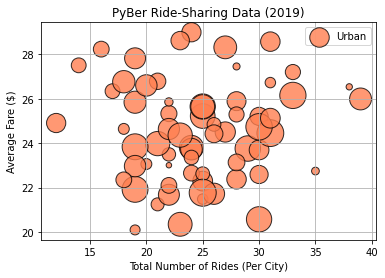

In [24]:
# BUild the scatter plots for urban cities
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s = 10 * urban_driver_count,
            edgecolors='black',
            linewidths=1,
            color = 'coral',
            alpha=.8,
            label = 'Urban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)

# Add the legend
plt.legend()

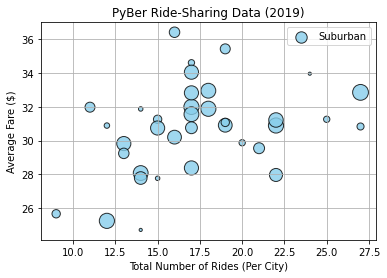

In [26]:
# BUild the scatter plots for suburban cities
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s = 10 * suburban_driver_count,
            edgecolors='black',
            linewidths=1,
            color = 'skyblue',
            alpha=.8,
            label = 'Suburban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)

# Add the legend
plt.legend()

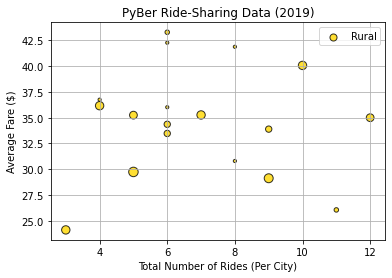

In [27]:
# BUild the scatter plots for rural cities
plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s = 10 * rural_driver_count,
            edgecolors='black',
            linewidths=1,
            color = 'gold',
            alpha=.8,
            label = 'Rural')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)

# Add the legend
plt.legend()

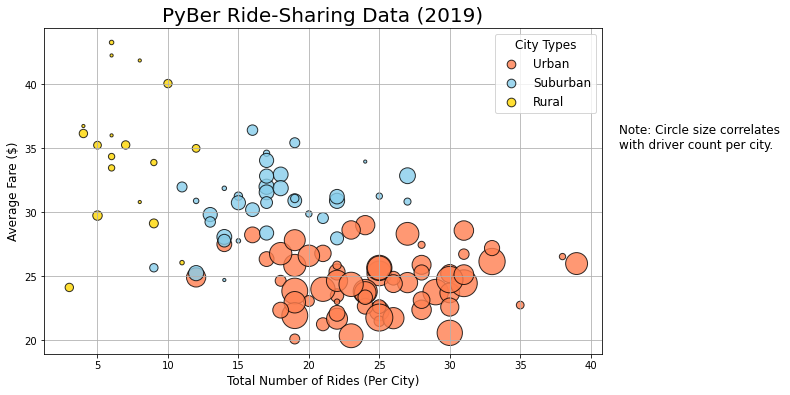

In [41]:
# Add the scatter charts for each type of city

plt.subplots(figsize=(10, 6))

# Urban
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s = 10 * urban_driver_count,
            edgecolors='black',
            linewidths=1,
            color = 'coral',
            alpha=.8,
            label = 'Urban')


# Suburban
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s = 10 * suburban_driver_count,
            edgecolors='black',
            linewidths=1,
            color = 'skyblue',
            alpha=.8,
            label = 'Suburban')


# Rural
plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s = 10 * rural_driver_count,
            edgecolors='black',
            linewidths=1,
            color = 'gold',
            alpha=.8,
            label = 'Rural')

# Incorporate other graph properties
plt.title('PyBer Ride-Sharing Data (2019)', fontsize = 20)
plt.ylabel('Average Fare ($)', fontsize = 12)
plt.xlabel('Total Number of Rides (Per City)', fontsize = 12)
plt.grid(True)

# Add the legend
lgnd = plt.legend(fontsize='12',
                    mode = 'Expanded',
                    scatterpoints = 1,
                    loc = 'best',
                    title = 'City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Add text label about circle size
plt.text(42, 35, 'Note: Circle size correlates \nwith driver count per city.', fontsize='12')

# Save the figure
plt.savefig('Analysis/Fig1.png', bbox_inches = 'tight')

# Show the plot
plt.show()

In [42]:
# Urban Summary Stats
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [43]:
# Urban Summary Stats
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [44]:
# Suburban Summary Stats
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [45]:
# Rural Summary Stats
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [46]:
# Calculate the mean ride count for each city type
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [47]:
# Calculate median ride count for urban cities
urban_ride_count.median()

24.0

In [48]:
# Calculate the mode of the ride count for urban cities
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [49]:
# Calculate the mode of the ride count for suburban cities
suburban_ride_count.mode()

0    17
dtype: int64

In [50]:
# Import NumPy and the stats module from SciPy
import numpy as np 
import scipy.stats as sts 


In [52]:
# Calculate measures of central tendency of ride counts for urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f'The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.')

median_urban_ride_count = np.median(urban_ride_count)
print(f'The median for the ride counts for urban trips is {median_urban_ride_count}.')

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f'The mode for the ride counts for urban trips is {mode_urban_ride_count}.')

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [53]:
# Mode ride count in suburban cities
sts.mode(suburban_ride_count)

ModeResult(mode=array([17], dtype=int64), count=array([7]))

In [54]:
# Mode ride count in rural cities
sts.mode(rural_ride_count)

ModeResult(mode=array([6], dtype=int64), count=array([5]))

In [55]:
# Get the fares for the urban cities
urban_fares = urban_cities_df['fare']
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [56]:
# Meeasures of central tendency for the average fare for urban cities
mean_urban_fares = np.mean(urban_fares)
print(f'The mean fare price for urban trips is ${mean_urban_fares:.2f}.')

median_urban_fares = np.median(urban_fares)
print(f'The median fare price for urban trips is ${median_urban_fares}.')

mode_urban_fares = sts.mode(urban_fares)
print(f'The mode fare price for urban trips is {mode_urban_fares}.')

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [58]:
# Check average fare price between city types

# Get fares for rural and suburban cities
suburban_fares = suburban_cities_df['fare']
rural_fares = rural_cities_df['fare']

# Calculate summary stats for rural and suburban cities
suburban_fares.describe(), rural_fares.describe()

(count    625.000000
 mean      30.970128
 std       10.677508
 min       12.050000
 25%       21.970000
 50%       30.750000
 75%       39.830000
 max       49.960000
 Name: fare, dtype: float64, count    125.000000
 mean      34.623440
 std       14.558046
 min       10.110000
 25%       19.900000
 50%       37.050000
 75%       47.070000
 max       58.550000
 Name: fare, dtype: float64)

In [59]:
# Get driver count for urban cities
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [64]:
## Skill Drill

# Get driver count for suburban and rural cities
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

# Measures of central tendencies using numpy and scipy
# Suburban
mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)

# Rural
mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)

# Print results
print(f'Suburban Drivers: \n Mean: {mean_suburban_drivers:.2f} \n Median: {median_suburban_drivers} \n Mode: {mode_suburban_drivers} \n')
print(f'Rural Drivers: \n Mean: {mean_rural_drivers:.2f} \n Median: {median_rural_drivers} \n Mode: {mode_rural_drivers} ')

Suburban Drivers: 
 Mean: 13.71 
 Median: 16.0 
 Mode: ModeResult(mode=array([20], dtype=int64), count=array([79])) 

Rural Drivers: 
 Mean: 4.30 
 Median: 4.0 
 Mode: ModeResult(mode=array([1], dtype=int64), count=array([32])) 


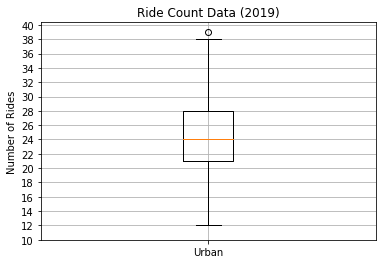

In [65]:
## BOX AND WHISKER PLOTS

# Create a boxplot for urban city ride count
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)

# Add title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step = 2.0))
ax.grid()

plt.show()

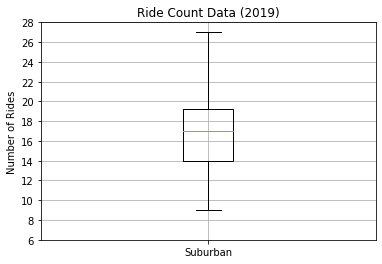

In [70]:
# Create boxplot for suburban city ride count
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels = ['Suburban'])

# Add title, y-axis label, and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(6, 29, step = 2.0))
ax.grid()

plt.show()

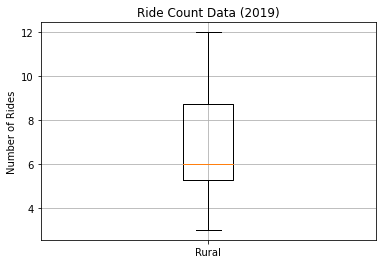

In [71]:
# Create boxplot for rural city ride count
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels = ['Rural'])

# Add title, y-axis label, and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
#ax.set_yticks(np.arange(6, 29, step = 2.0))
ax.grid()

plt.show()

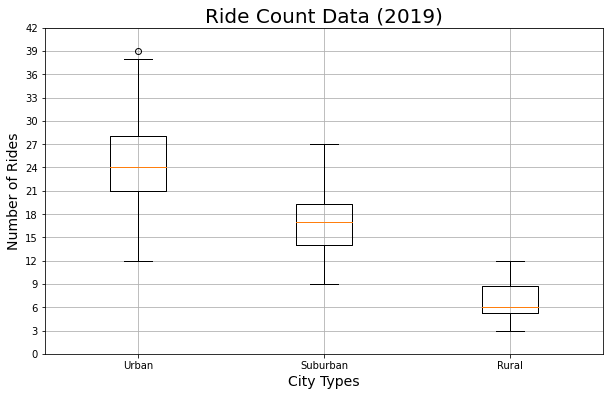

In [72]:
# Add al ride count boxplots to the same graph
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_count_data, labels = x_labels)
ax.set_yticks(np.arange(0, 45, step = 3.0))
ax.grid()

# Save the figure
plt.savefig('Analysis/Fig2.png')

plt.show()

In [73]:
# Get the city that matches 39 (Highest rider count and outlier)
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f'{urban_city_outlier} has the highest rider count.')

West Angela has the highest rider count.


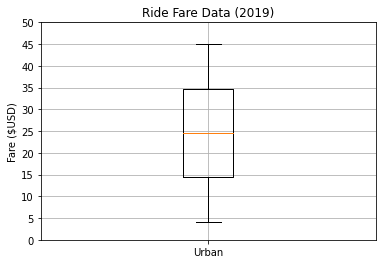

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [75]:
# Create boxplot for urban fare data
x_labels = ['Urban']

fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels = x_labels)

# Add title, y-axis label, and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0, 51, step = 5.0))
ax.grid()

plt.show()

print('Summary Statistics')
urban_fares.describe()

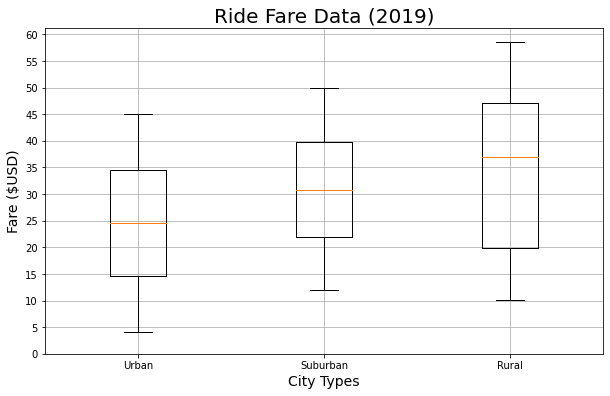

In [78]:
# Skill Drill
# Create boxplot with all three city types
x_labels = ['Urban', 'Suburban', 'Rural']
fare_data = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(fare_data, labels = x_labels)
ax.set_yticks(np.arange(0, 61, step = 5.0))
ax.grid()

# Save the figure
plt.savefig('Analysis/Fig3.png')

plt.show()

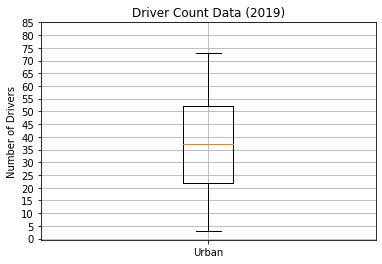

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [80]:
# Create boxplot for urban driver count
x_labels = ['Urban']

fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels = x_labels)

# Add title, y-axis label, and grid
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step = 5.0))
ax.grid()

plt.show()

print('Summary Statistics')
urban_drivers.describe()

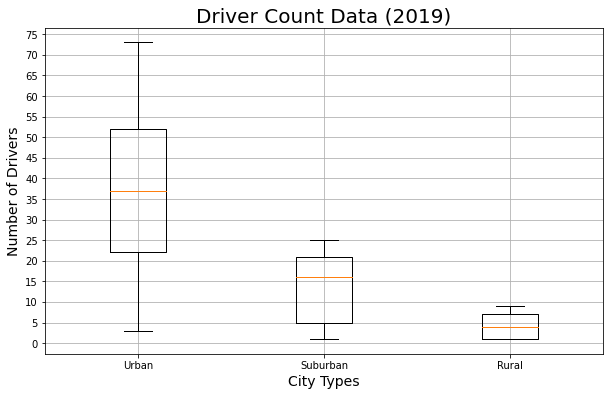

In [82]:
# Skill Drill
# Create boxplot with all three city types 
x_labels = ['Urban', 'Suburban', 'Rural']
driver_data = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(driver_data, labels = x_labels)
ax.set_yticks(np.arange(0, 76, step = 5.0))
ax.grid()

# Save the figure
plt.savefig('Analysis/Fig4.png')

plt.show()

In [84]:
# Get the sum of the fares for each city type
sum_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [88]:
# Get the sum of all fares
total_fares = pyber_data_df['fare'].sum()
total_fares

63538.64

In [89]:
# Calculate the percentage of fare for each city type
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

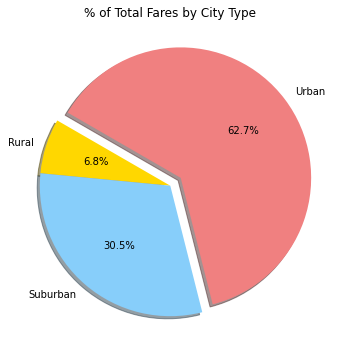

In [95]:
# Import mpl to change plot configs using rcParams
import matplotlib as mpl 

# Build the prcentage of fares by city type pie chart
plt.subplots(figsize=(10, 6))

plt.pie(type_percents, 
        labels = ['Rural', 'Suburban', 'Urban'],
        colors = ['gold', 'lightskyblue', 'lightcoral'],
        explode = [0, 0, 0.1],
        autopct = '%1.1f%%',
        shadow = True,
        startangle=150)

plt.title('% of Total Fares by City Type')

# Change default font size from 10 to 14
mpl.rcParams['font.size'] = 14

# Save figure
plt.savefig('Analysis/Fig5.png')

# Show figure
plt.show()